# Capstone 2 - Baseball Stat Projections - Exploratory Data Analysis

In [233]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [234]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data"
os.chdir(path)
print(os.getcwd())

/Users/joeboardman/Documents/Springboard/Capstone 2/data


In [249]:
df = pd.read_csv('Baseball_DW.csv', index_col=0)
df.head()

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,birth_country,name_first,name_last,name_given,salary,obp,slg,ops,year_of_career,age
15,abbotje01,1998,89.0,244.0,33.0,68.0,14.0,1.0,12.0,41.0,...,USA,Jeff,Abbott,Jeffrey William,175000,0.304348,0.491803,0.796151,1,26
17,abbotje01,2000,80.0,215.0,31.0,59.0,15.0,1.0,3.0,29.0,...,USA,Jeff,Abbott,Jeffrey William,255000,0.344538,0.395349,0.739887,3,28
29,abbotku01,1994,101.0,345.0,41.0,86.0,17.0,3.0,9.0,33.0,...,USA,Kurt,Abbott,Kurt Thomas,109000,0.292350,0.394203,0.686553,1,25
30,abbotku01,1995,120.0,420.0,60.0,107.0,18.0,7.0,17.0,60.0,...,USA,Kurt,Abbott,Kurt Thomas,119000,0.321041,0.452381,0.773422,2,26
31,abbotku01,1996,109.0,320.0,37.0,81.0,18.0,7.0,8.0,33.0,...,USA,Kurt,Abbott,Kurt Thomas,250000,0.307246,0.428125,0.735371,3,27


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10286 entries, 15 to 24780
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       10286 non-null  object 
 1   year            10286 non-null  int64  
 2   g               10286 non-null  float64
 3   ab              10286 non-null  float64
 4   r               10286 non-null  float64
 5   h               10286 non-null  float64
 6   double          10286 non-null  float64
 7   triple          10286 non-null  float64
 8   hr              10286 non-null  float64
 9   rbi             10286 non-null  float64
 10  sb              10286 non-null  float64
 11  cs              10286 non-null  float64
 12  bb              10286 non-null  float64
 13  so              10286 non-null  float64
 14  ibb             10286 non-null  float64
 15  hbp             10286 non-null  float64
 16  sh              10286 non-null  float64
 17  sf              10286 non-null

In [251]:
round(df.describe().T,3)


,count,mean,std,min,25%,50%,75%,max
year,10286.0,2000.225,8.768,1985.000,1993.000,2000.000,2008.000,2.015000e+03
g,10286.0,113.814,33.694,34.000,86.000,118.000,144.000,1.630000e+02
ab,10286.0,380.336,153.716,130.000,240.000,383.000,518.000,7.160000e+02
r,10286.0,52.747,27.999,4.000,29.000,48.000,73.000,1.520000e+02
h,10286.0,102.712,47.511,19.000,60.000,100.000,142.000,2.620000e+02
double,10286.0,19.892,10.590,0.000,11.000,18.500,27.000,5.900000e+01
triple,10286.0,2.220,2.403,0.000,0.500,2.000,3.000,2.300000e+01
hr,10286.0,11.733,10.066,0.000,4.000,9.000,17.000,7.300000e+01
rbi,10286.0,50.430,29.120,3.000,26.083,45.000,69.000,1.650000e+02
sb,10286.0,7.704,10.579,0.000,1.000,4.000,10.000,1.100000e+02


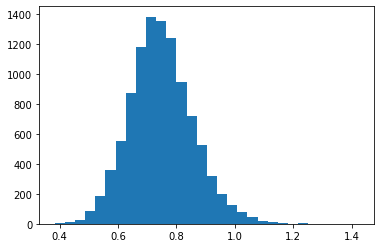

In [262]:
plt.hist(df['ops'], bins=30)
plt.show()

In [264]:
#group by mean OPS by year
df_test = df.groupby(['year_of_career'])[['ops', 'h', 'hr', 'double', 'ab', 'g']].mean()
print(df_test.head())
print(type(df_test))


                     ops           h         hr     double          ab  \
year_of_career                                                           
0               0.703087   79.212245   6.879592  14.491837  301.565306   
1               0.720207   94.137781   9.354738  18.117207  357.898379   
2               0.733503  100.130903  10.586285  19.489931  375.290799   
3               0.747544  106.726964  11.754930  20.947139  394.540737   
4               0.749703  106.953802  11.903272  20.937440  394.098171   

                         g  
year_of_career              
0                93.893878  
1               109.458853  
2               113.631424  
3               118.144520  
4               117.592397  
<class 'pandas.core.frame.DataFrame'>


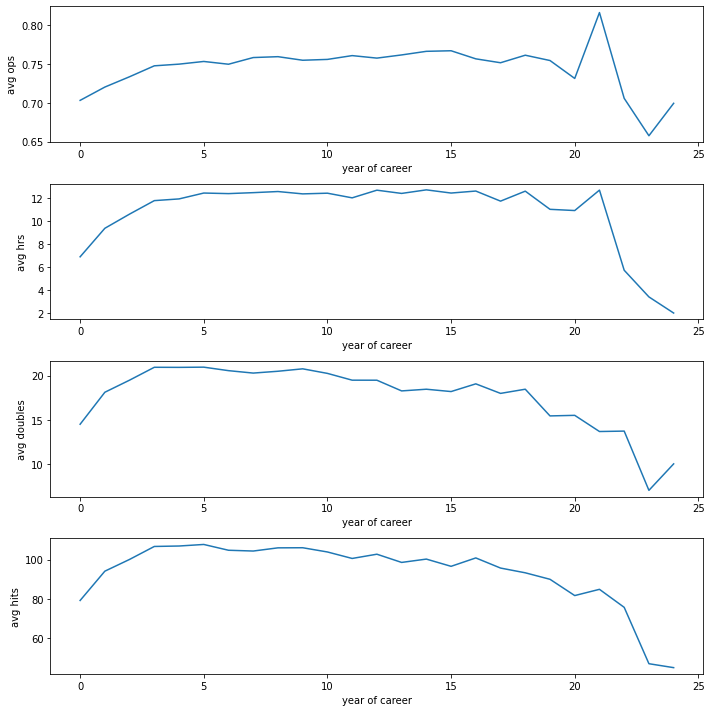

In [266]:
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
plt.plot(df_test.index, df_test.ops)
plt.xlabel('year of career')
plt.ylabel('avg ops')

plt.subplot(4,1,2)
plt.plot(df_test.index, df_test.hr)
plt.xlabel('year of career')
plt.ylabel('avg hrs')

plt.subplot(4,1,3)
plt.plot(df_test.index, df_test.double)
plt.xlabel('year of career')
plt.ylabel('avg doubles')

plt.subplot(4,1,4)
plt.plot(df_test.index, df_test.h)
plt.xlabel('year of career')
plt.ylabel('avg hits')

plt.tight_layout()
plt.show()

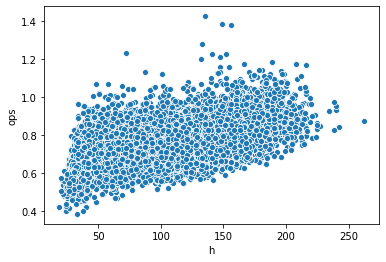

In [255]:
sns.scatterplot(df.h, df.ops)

In [256]:
#correlation table
corr = df.corr()
#heatmap
corr.round(2).style.background_gradient(cmap='coolwarm')

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh,salary,obp,slg,ops,year_of_career,age
year,1.000000,0.010000,0.040000,0.020000,0.030000,0.100000,-0.050000,0.070000,0.030000,-0.080000,-0.160000,-0.020000,0.200000,-0.070000,0.170000,-0.110000,-0.030000,0.050000,0.000000,0.010000,0.010000,0.000000,0.010000,-0.010000,0.000000,0.000000,0.000000,0.010000,0.390000,-0.030000,0.060000,0.030000,-0.020000,0.030000
g,0.010000,1.000000,0.920000,0.820000,0.880000,0.780000,0.400000,0.570000,0.750000,0.360000,0.400000,0.660000,0.660000,0.400000,0.360000,0.140000,0.550000,0.590000,-0.080000,0.200000,0.130000,0.140000,0.160000,0.120000,0.170000,0.160000,0.270000,0.070000,0.170000,0.330000,0.350000,0.370000,-0.020000,-0.090000
ab,0.040000,0.920000,1.000000,0.900000,0.970000,0.850000,0.440000,0.620000,0.820000,0.420000,0.440000,0.670000,0.680000,0.400000,0.390000,0.100000,0.590000,0.650000,-0.090000,0.180000,0.140000,0.130000,0.170000,0.100000,0.190000,0.150000,0.270000,0.090000,0.260000,0.360000,0.420000,0.430000,-0.010000,-0.100000
r,0.020000,0.820000,0.900000,1.000000,0.920000,0.830000,0.460000,0.720000,0.840000,0.490000,0.450000,0.780000,0.660000,0.440000,0.420000,0.030000,0.550000,0.520000,-0.180000,0.180000,0.120000,0.090000,0.100000,0.150000,0.230000,0.170000,0.340000,0.090000,0.300000,0.570000,0.600000,0.640000,0.000000,-0.090000
h,0.030000,0.880000,0.970000,0.920000,1.000000,0.880000,0.450000,0.620000,0.830000,0.430000,0.430000,0.670000,0.600000,0.430000,0.380000,0.070000,0.580000,0.640000,-0.110000,0.190000,0.140000,0.120000,0.140000,0.110000,0.180000,0.150000,0.270000,0.090000,0.270000,0.500000,0.520000,0.560000,0.000000,-0.090000
double,0.100000,0.780000,0.850000,0.830000,0.880000,1.000000,0.320000,0.610000,0.800000,0.270000,0.280000,0.620000,0.590000,0.410000,0.380000,-0.040000,0.560000,0.590000,-0.080000,0.210000,0.110000,0.140000,0.080000,0.100000,0.110000,0.150000,0.220000,0.090000,0.270000,0.470000,0.580000,0.580000,-0.010000,-0.090000
triple,-0.050000,0.400000,0.440000,0.460000,0.450000,0.320000,1.000000,0.070000,0.210000,0.540000,0.510000,0.220000,0.240000,0.070000,0.110000,0.230000,0.160000,0.080000,-0.190000,-0.100000,0.130000,-0.040000,0.170000,0.110000,0.330000,0.080000,0.320000,-0.100000,-0.050000,0.150000,0.150000,0.160000,-0.150000,-0.190000
hr,0.070000,0.570000,0.620000,0.720000,0.620000,0.610000,0.070000,1.000000,0.890000,0.040000,0.050000,0.650000,0.690000,0.520000,0.350000,-0.320000,0.470000,0.440000,-0.060000,0.290000,-0.100000,0.110000,-0.100000,0.140000,0.040000,0.210000,0.240000,0.210000,0.350000,0.440000,0.810000,0.740000,0.070000,-0.020000
rbi,0.030000,0.750000,0.820000,0.840000,0.830000,0.800000,0.210000,0.890000,1.000000,0.150000,0.170000,0.700000,0.680000,0.530000,0.370000,-0.200000,0.650000,0.610000,-0.070000,0.300000,-0.020000,0.140000,-0.010000,0.130000,0.060000,0.200000,0.240000,0.200000,0.340000,0.500000,0.730000,0.700000,0.070000,-0.030000
sb,-0.080000,0.360000,0.420000,0.490000,0.430000,0.270000,0.540000,0.040000,0.150000,1.000000,0.760000,0.280000,0.210000,0.050000,0.130000,0.270000,0.120000,0.020000,-0.200000,-0.140000,0.150000,-0.080000,0.120000,0.150000,0.410000,0.070000,0.380000,-0.110000,0.000000,0.180000,0.040000,0.100000,-0.110000,-0.160000


In [257]:
# Call the variable corr_matrix
corr_matrix = df.drop(['ops'], axis=1).corr().abs()

# Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Iterate through our columns to gets the index of any that have a correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [258]:
# Features to be dropped
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['h']


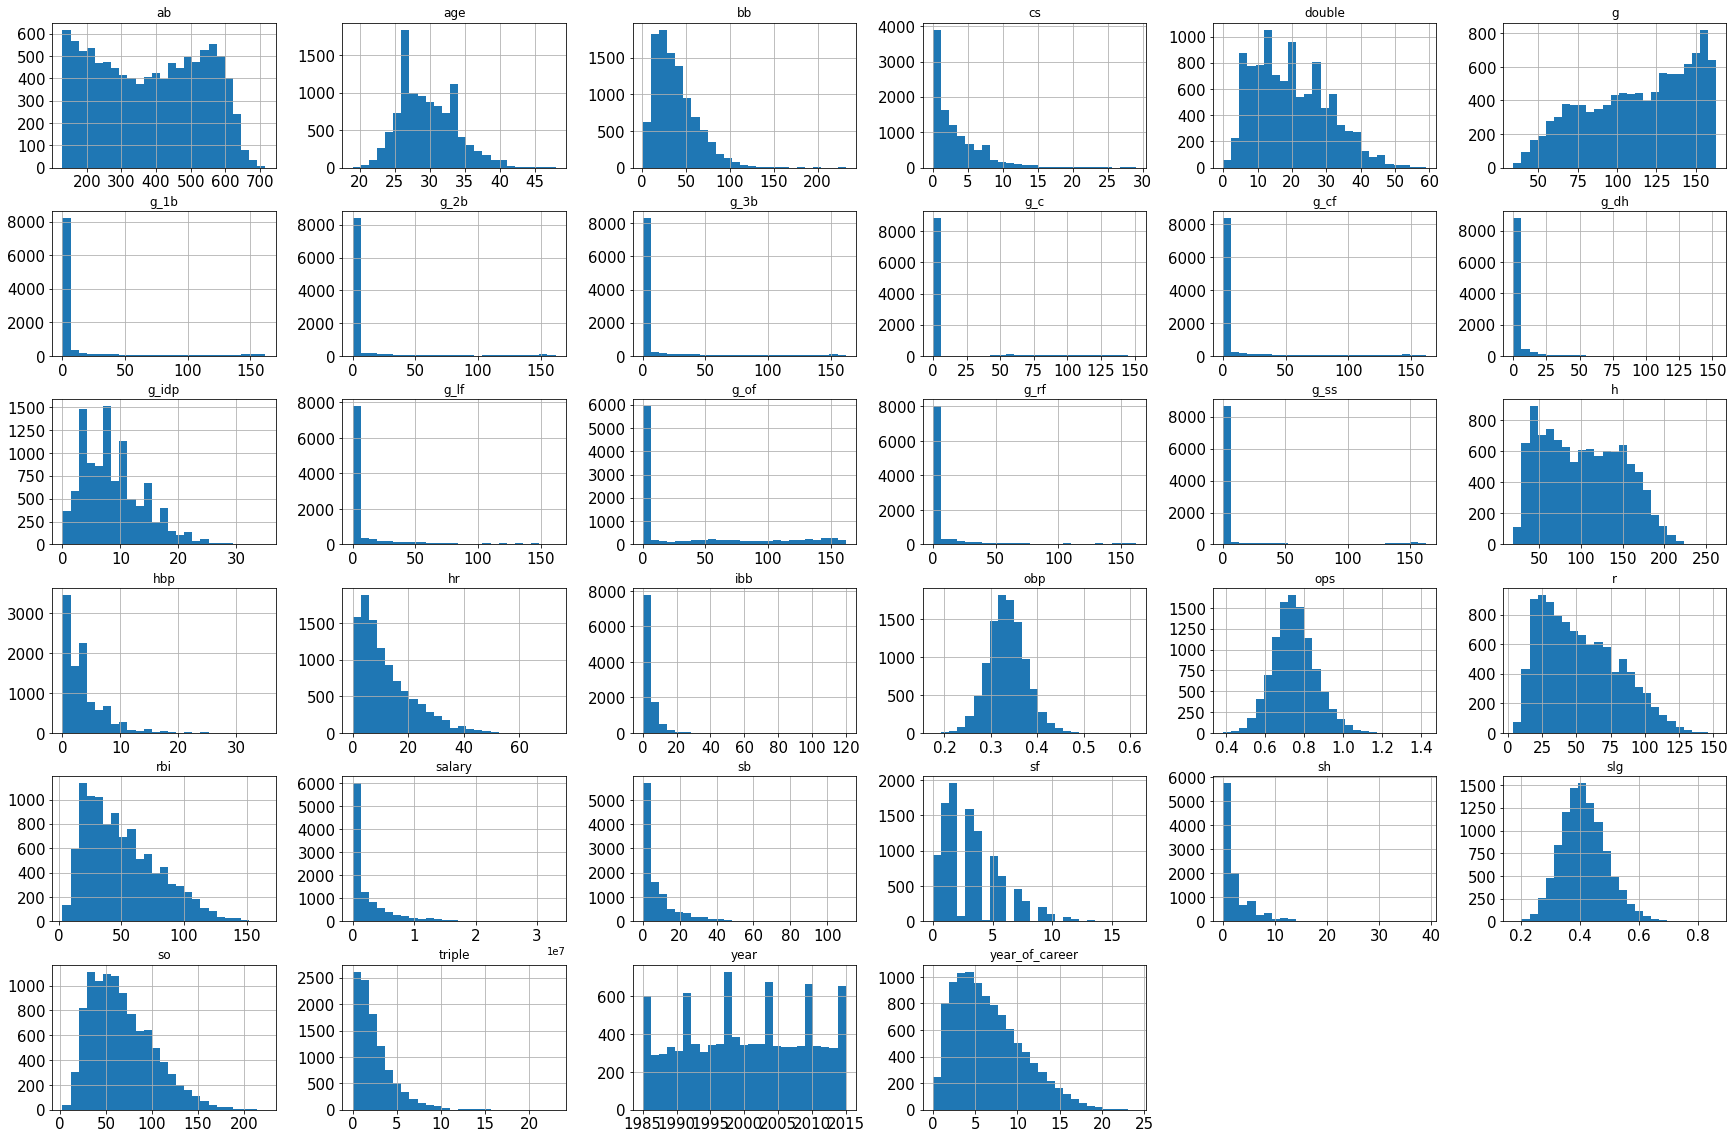

In [259]:
df.hist(bins=25, figsize=[30, 20], xlabelsize=15, ylabelsize=15)
plt.show()

/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


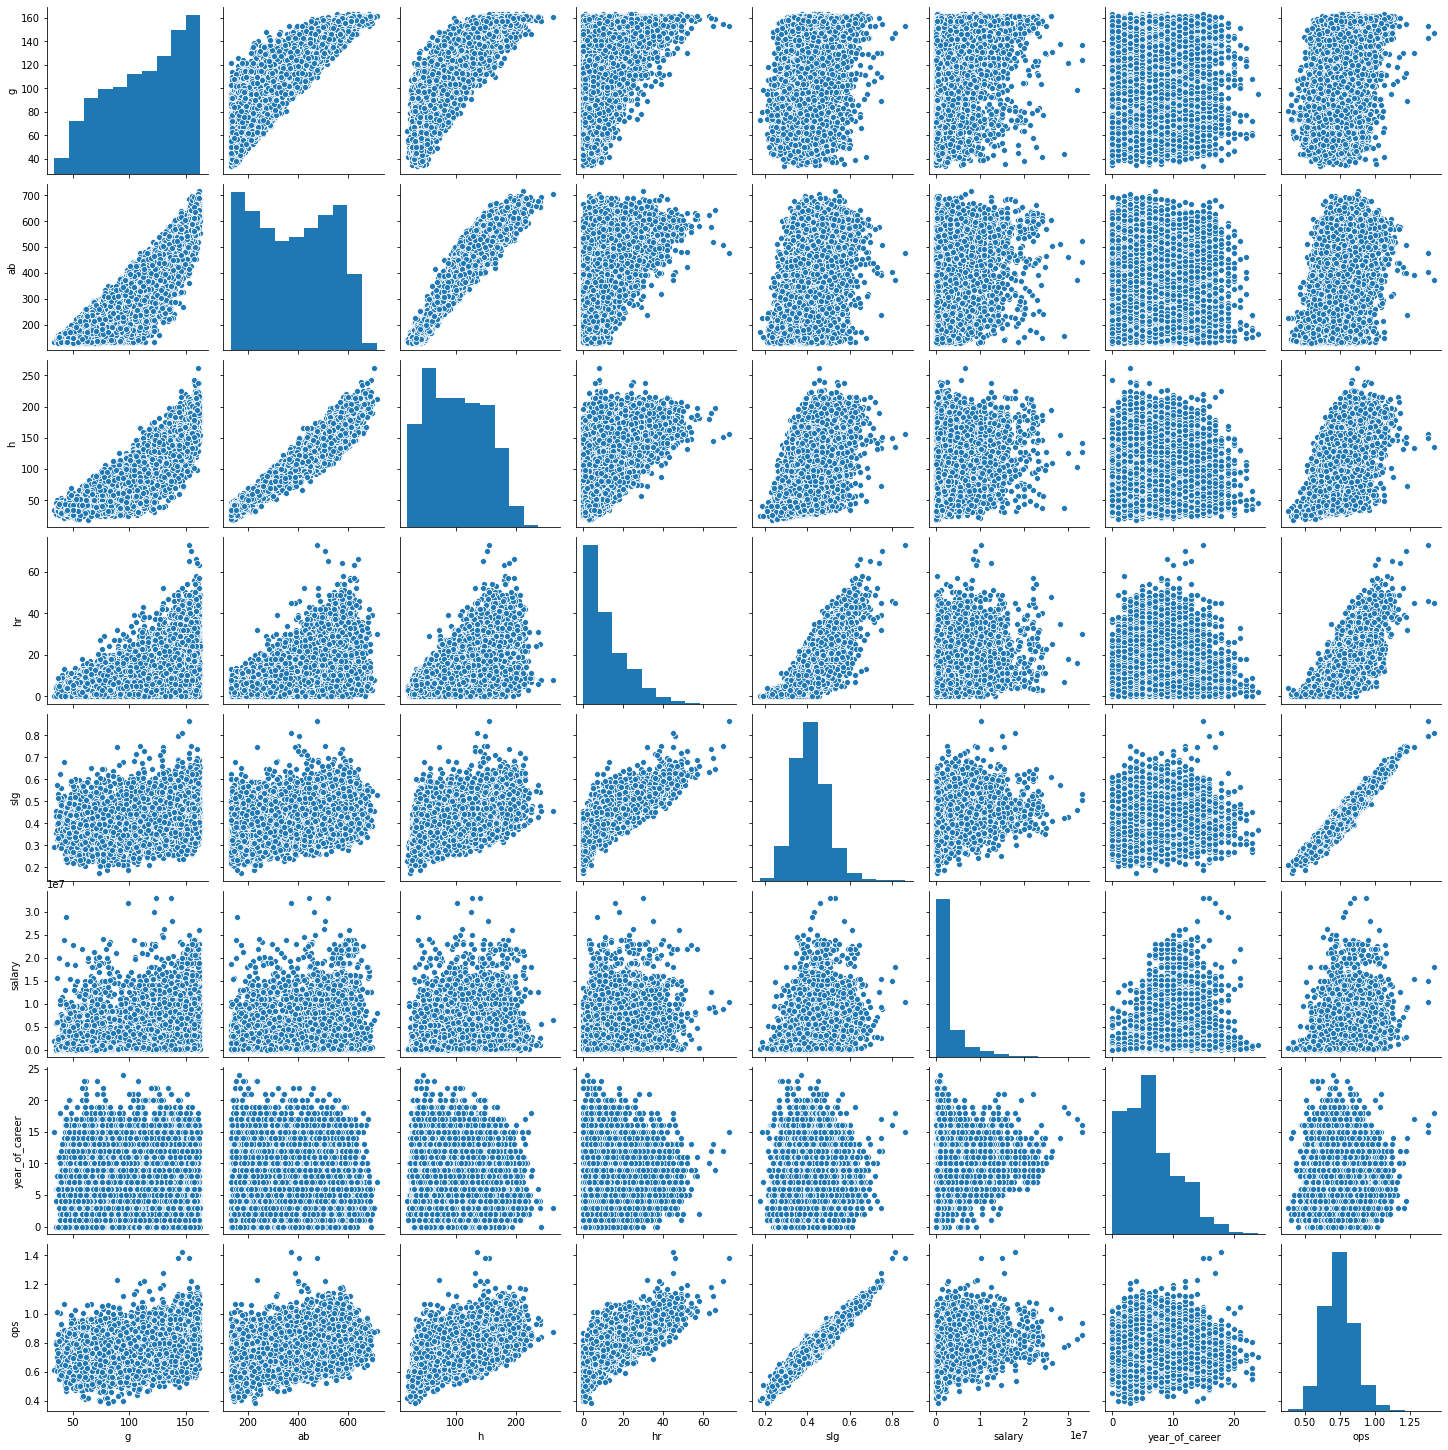

In [260]:
df_test = df.groupby(df.index)['g', 'ab', 'h', 'hr', 'slg', 'salary', 'year_of_career', 'ops'].sum()

pairplot1 = sns.pairplot(df_test)